# Passengers

The exploration uses information ranging from Dec 1, 2018 to Apr 1, 2019.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
orig_pass = pd.read_csv("./data/passenger_data.csv")

orig_pass.shape

(200360, 38)

# Cleaning

In [3]:
orig_pass.head()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
0,0.0,70.0,84000.0,420.0,71.0,10461.0,0.0,7.0,919.0,505.0,...,US,United States,3,364,1,2019,4,1,F,DU
1,0.0,120.0,144000.0,720.0,102.0,5850.0,0.0,7.0,1070.0,853.0,...,US,United States,3,364,1,2019,4,1,L,DU
2,0.0,4.0,4800.0,24.0,0.0,167.0,0.0,51.0,150.0,121.0,...,US,United States,3,362,1,2019,4,1,L,DU
3,0.0,1.0,1200.0,6.0,3.0,60.0,0.0,0.0,36.0,31.0,...,US,United States,3,366,1,2019,4,1,L,DU
4,0.0,4.0,4800.0,24.0,10.0,700.0,0.0,0.0,114.0,98.0,...,US,United States,3,364,1,2019,4,1,L,DU


In [4]:
orig_pass.dtypes

departures_scheduled     float64
departures_performed     float64
payload                  float64
seats                    float64
passengers               float64
freight                  float64
mail                     float64
distance                 float64
ramp_to_ramp             float64
air_time                 float64
unique_carrier            object
airline_id                 int64
unique_carrier_name       object
region                    object
carrier                   object
carrier_name              object
carrier_group              int64
carrier_group_new          int64
origin_airport_id          int64
origin_city_market_id      int64
origin                    object
origin_city_name          object
origin_country            object
origin_country_name       object
dest_airport_id            int64
dest_city_market_id        int64
dest                      object
dest_city_name            object
dest_country              object
dest_country_name         object
aircraft_g

In [5]:
orig_pass.drop("data_source", axis=1, inplace=True)

In [6]:
# change dtype of passengers, seats, and departures because people don't come in parts
orig_pass = orig_pass.astype({"departures_scheduled": "int64",
                 "departures_performed": "int64",
                 "seats": "int64",
                 "passengers": "int64"})

In [7]:
# contains similar info
orig_pass[["unique_carrier", "carrier_name", "unique_carrier_name", "carrier"]]

,unique_carrier,carrier_name,unique_carrier_name,carrier
0,3AQ,"Maritime Helicopters, Inc.","Maritime Helicopters, Inc.",3AQ
1,3AQ,"Maritime Helicopters, Inc.","Maritime Helicopters, Inc.",3AQ
2,3AQ,"Maritime Helicopters, Inc.","Maritime Helicopters, Inc.",3AQ
3,3AQ,"Maritime Helicopters, Inc.","Maritime Helicopters, Inc.",3AQ
4,3AQ,"Maritime Helicopters, Inc.","Maritime Helicopters, Inc.",3AQ
...,...,...,...,...
200355,HA,Hawaiian Airlines Inc.,Hawaiian Airlines Inc.,HA
200356,HA,Hawaiian Airlines Inc.,Hawaiian Airlines Inc.,HA
200357,HA,Hawaiian Airlines Inc.,Hawaiian Airlines Inc.,HA
200358,1SQ,Star Marianas Air Inc.,Star Marianas Air Inc.,1SQ


In [8]:
pass_df = orig_pass.copy()

In [9]:
# keeping unique_carrier and unique_carrier_name
pass_df.drop(["carrier", "carrier_name"], axis=1, inplace=True)

In [10]:
# some carrier groups are updated to a new code
# drop carrier_group
pass_df.drop(["carrier_group"], axis=1, inplace=True)

In [11]:
pass_df.isnull().sum()

departures_scheduled     0
departures_performed     0
payload                  0
seats                    0
passengers               0
freight                  0
mail                     0
distance                 0
ramp_to_ramp             0
air_time                 0
unique_carrier           0
airline_id               0
unique_carrier_name      0
region                   0
carrier_group_new        0
origin_airport_id        0
origin_city_market_id    0
origin                   0
origin_city_name         0
origin_country           0
origin_country_name      0
dest_airport_id          0
dest_city_market_id      0
dest                     0
dest_city_name           0
dest_country             0
dest_country_name        0
aircraft_group           0
aircraft_type            0
aircraft_config          0
year                     0
month                    0
distance_group           0
class                    0
dtype: int64

In [12]:
final_pass = pass_df[["year", "month", 
                      "airline_id", "unique_carrier", "unique_carrier_name", 
                      "origin_airport_id", "origin_city_name",
                      "dest_airport_id", "dest_city_name",
                      "seats", "passengers",
                      "distance",
                      "class",
                      "payload"]]
final_pass.head()

,year,month,airline_id,unique_carrier,unique_carrier_name,origin_airport_id,origin_city_name,dest_airport_id,dest_city_name,seats,passengers,distance,class,payload
0,2019,4,21909,3AQ,"Maritime Helicopters, Inc.",16567,"Akun, AK",12786,"Akutan, AK",420,71,7.0,F,84000.0
1,2019,4,21909,3AQ,"Maritime Helicopters, Inc.",16567,"Akun, AK",12786,"Akutan, AK",720,102,7.0,L,144000.0
2,2019,4,21909,3AQ,"Maritime Helicopters, Inc.",16668,"Deadhorse1, AK",14709,"Deadhorse, AK",24,0,51.0,L,4800.0
3,2019,4,21909,3AQ,"Maritime Helicopters, Inc.",10170,"Kodiak, AK",10170,"Kodiak, AK",6,3,0.0,L,1200.0
4,2019,4,21909,3AQ,"Maritime Helicopters, Inc.",11214,"Coldfoot, AK",11214,"Coldfoot, AK",24,10,0.0,L,4800.0


In [13]:
final_pass.to_csv("./data/passengers_clean.csv", index=False)

# Exploration

In [14]:
# average passengers per month
avg_pass = final_pass[["unique_carrier", "month", "passengers"]].groupby("month").mean().reset_index()

avg_pass.head()

,month,passengers
0,1,1919.806072
1,2,1876.343798
2,3,2252.240436
3,4,2231.654466
4,12,2044.439673


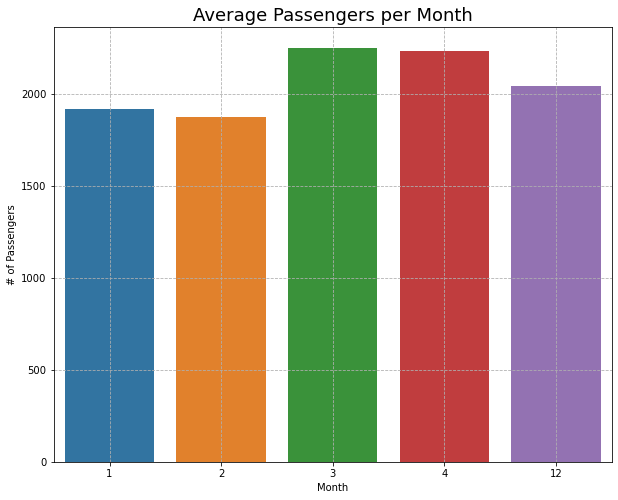

In [15]:
fig, ax = plt.subplots(figsize=(10,8))

sns.barplot(x="month", y="passengers", data=avg_pass)
ax.grid(linestyle="--")
ax.set_title("Average Passengers per Month", fontsize=18)
ax.set_ylabel("# of Passengers")
ax.set_xlabel("Month")

plt.show()

In the above graph, the 12th month is from 2018. The rest are from 2019.

Next, I will be comparing the highest number of flights and the number of passengers by airline. Because the Flights data contained information for 3 months (January, March, and April), I will need to filter out the months from the Passengers data that are not in Flights. These months are December and Febuary.

In [16]:
pass_exp = final_pass[(final_pass["month"] != 12) & (final_pass["month"] != 2)]

pass_exp.month.unique()

array([4, 3, 1], dtype=int64)

In [17]:
# saving copy of passengers with Dec and Feb filtered out
pass_exp.to_csv("./data/pass_decfeb_removed.csv")

### Highest Passengers

In [18]:
pass_exp = pass_exp[["unique_carrier", "month", "passengers"]]

# number of passengers per carrier by month
sum_pass = pass_exp.groupby(["unique_carrier", "month"]).sum()
# mean passengers per carrier 
avg_pass = sum_pass.groupby(["unique_carrier"]).mean().sort_values(by="passengers", ascending=False)

top10 = avg_pass.head(10)
top10

,passengers
unique_carrier,
WN,1.372482e+07
DL,1.287594e+07
AA,1.263066e+07
UA,9.325688e+06
B6,3.577897e+06
OO,3.333310e+06
AS,2.836219e+06
NK,2.763309e+06
F9,1.686978e+06


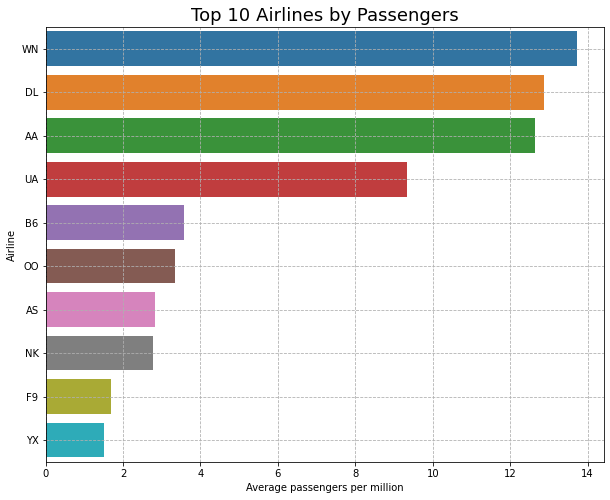

In [19]:
plt_top10 = top10.reset_index()

# comparing the top airlines according to number of passengers
fig, ax = plt.subplots(figsize=(10,8))

sns.barplot(x=plt_top10.passengers.values/1000000, y="unique_carrier", data=plt_top10)
ax.grid(linestyle="--")
ax.set_title("Top 10 Airlines by Passengers", fontsize=18)
ax.set_ylabel("Airline")
ax.set_xlabel("Average passengers per million")

plt.show()

### Top flights

In [20]:
flights = pd.read_csv("./data/flights_clean.csv")

In [21]:
flights_exp = flights[["mkt_unique_carrier", "month", "flights"]]

# number of flights per carrier by month
sum_flights = flights_exp.groupby(["mkt_unique_carrier", "month"]).sum()
# mean flights per carrier 
avg_flights = sum_flights.groupby(["mkt_unique_carrier"]).mean().sort_values(by="flights", ascending=False)

avg_flights

,flights
mkt_unique_carrier,
AA,33285.333333
DL,27986.333333
UA,24201.000000
WN,22009.333333
AS,7016.666667
B6,4590.000000
NK,3083.666667
F9,2010.333333
HA,1594.333333


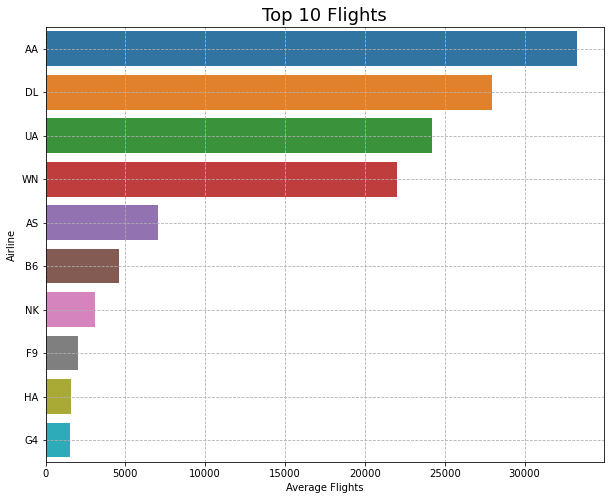

In [22]:
avg_flights = avg_flights.reset_index()

# comparing the top airlines according to number of flights
fig, ax = plt.subplots(figsize=(10,8))

sns.barplot(x=avg_flights.flights.values, y="mkt_unique_carrier", data=avg_flights)
ax.grid(linestyle="--")
ax.set_title("Top 10 Flights", fontsize=18)
ax.set_ylabel("Airline")
ax.set_xlabel("Average Flights")

plt.show()

In [21]:
# does biggest number of flights mean that the biggest number of passengers went through 
# the particular airport

In [23]:
plt_top10_cp = plt_top10.rename({"unique_carrier": "mkt_unique_carrier"}, axis=1)

In [24]:
combined = pd.merge(avg_flights, plt_top10_cp, on="mkt_unique_carrier", how="outer")

combined

,mkt_unique_carrier,flights,passengers
0,AA,33285.333333,1.263066e+07
1,DL,27986.333333,1.287594e+07
2,UA,24201.000000,9.325688e+06
3,WN,22009.333333,1.372482e+07
4,AS,7016.666667,2.836219e+06
5,B6,4590.000000,3.577897e+06
6,NK,3083.666667,2.763309e+06
7,F9,2010.333333,1.686978e+06
8,HA,1594.333333,NaN
9,G4,1499.666667,NaN


Text(0, 0.5, '# of passengers per million')

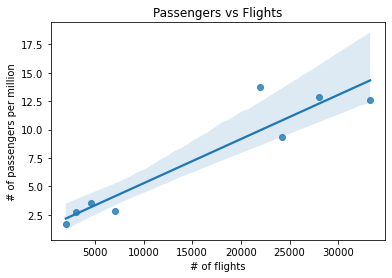

In [27]:
ax = sns.regplot(x=combined.flights, y=combined.passengers/1000000, data=combined)
ax.set_title("Passengers vs Flights")
ax.set_xlabel("# of flights")
ax.set_ylabel("# of passengers per million")

In [28]:
test = final_pass.copy()

In [29]:
test["percent_capacity"] = (test["passengers"] / test["seats"]) * 100

In [30]:
test.head()

,year,month,airline_id,unique_carrier,unique_carrier_name,origin_airport_id,origin_city_name,dest_airport_id,dest_city_name,seats,passengers,distance,class,payload,percent_capacity
0,2019,4,21909,3AQ,"Maritime Helicopters, Inc.",16567,"Akun, AK",12786,"Akutan, AK",420,71,7.0,F,84000.0,16.904762
1,2019,4,21909,3AQ,"Maritime Helicopters, Inc.",16567,"Akun, AK",12786,"Akutan, AK",720,102,7.0,L,144000.0,14.166667
2,2019,4,21909,3AQ,"Maritime Helicopters, Inc.",16668,"Deadhorse1, AK",14709,"Deadhorse, AK",24,0,51.0,L,4800.0,0.000000
3,2019,4,21909,3AQ,"Maritime Helicopters, Inc.",10170,"Kodiak, AK",10170,"Kodiak, AK",6,3,0.0,L,1200.0,50.000000
4,2019,4,21909,3AQ,"Maritime Helicopters, Inc.",11214,"Coldfoot, AK",11214,"Coldfoot, AK",24,10,0.0,L,4800.0,41.666667
